Download this page as a jupyter notebook at [Lesson 21](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson21/ENGR-1330-Lesson21.ipynb)

---
<div class="alert alert-block alert-info">
    <b><h1>ENGR 1330 Computational Thinking with Data Science </h1></b> 
</div>

Last GitHub Commit Date: 8 Nov 2021

## Lesson 21 : Distributions and Probability Estimation Modeling

Procedures to judge our prediction engine.  

<!-- ## Lesson 19 :  Building Prediction Engines by Regression 

A procedure to model the relationship between one dependent variable and one or more independent variables and quantify the uncertainty involved in response predictions.

![](https://www.thermofisher.com/blog/wp-content/uploads/sites/11/2018/01/istock-829172394_redumbrella.jpg)-->

## Objectives

- Create data models using probability distribution functions
- Create empirical probabilities using order-statistics (plotting positions)
- Create estimates of magnitudes for prescribed probability values
---

## Computational Thinking Concepts

|Description|Computational Thinking Concept|
|:---|:---|
|Linear Model|Abstraction|
|Response and Explanatory Variables|Decomposition|
|Primitive arrays: vectors and matrices|Data Representation|
|NumPy arrays: vectors and matrices|Data Representation|


---

## Textbook Resources

[https://inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html](https://inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html)

<hr>


In [4]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)
! pwd

atomickitty
sensei
/opt/jupyterhub/bin/python3
3.8.10 (default, Sep 28 2021, 16:10:42) 
[GCC 9.3.0]
sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0)
/home/sensei/engr-1330-webroot/1-Lessons/Lesson21


In [5]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

Probability estimation modeling is the use of probability distributions (population data models) to model or explain behavior in observed (sample data) values.  Once a particular distribution is selected, then the concept of risk (probability) can be explored for events of varying magnitudes.

Two important “extremes” in engineering:

- Uncommon (rare) events (floods, nuclear plant explosions, etc.)

- Common, almost predictable events (routine discharges, traffic accidents at a dangerous intersection, network failure on a due date, etc.)

The probability distribution is just a model of the data, like a trend line for deterministic behavior; different distributions have different shapes, and domains and can explain certain types of observations better than others.

Some Useful Distributions (data models) include:

- Normal
- LogNormal
- Gamma
- Weibull
- Extreme Value (Gumbell)
- Beta

There are many more; they all have the common property that they integrate to unity on the domain $-\infty~to ~ \infty$.  

The probability distributions (models) are often expressed as a density function or a cumulative distribution function. 

A useful notation using the Normal density function as an example is:

$$ \text{pdf(x)} = \frac{1}{\sigma \sqrt{2\pi}} \times exp (-\frac{(x-\mu)^2}{2 \sigma^2}) $$

In the function, $x$ is the random variable, $\mu$ is the **population** mean and $\sigma^2$ is the **population** variance.  
Often we don't actually know the population values so we estimate them from the collection of observations, in this context these are called the **sample** mean and variance.   Computation of the **sample** values is done using methods described in the earlier lesson on descriptive statistics.

The integral of the $ \text{pdf(x)} $ from $-\infty~to ~ X $, produces a result called the cumulative distribution function.  The value $ X $ is not a random variable, but the integral the probability of the random variable $x$ being less than or equal to $X$.

A useful notation using the Normal distribution as an example is:

$$ F(X) =  \int_{-\infty}^X{\frac{1}{\sigma \sqrt{2\pi}} \times exp (-\frac{(x-\mu)^2}{2 \sigma^2}) dx}$$

For the Normal distribution the integral is a special function called the Error function and can be written as:

$$ F(X) =  \frac{1}{2} \cdot (1+erf(\frac{(X-\mu)}{\sqrt{2} \sigma}))$$

## Normal Distribution Model (Using Math Package)

Here we will build a normal distribution model, essentially the functions for the above equations, and then will plot them.
Then we will sample from a list of numbers from 1 to 100 and see if the data model is representative of the sample.

In [3]:
import math

def normdensity(x,mu,sigma):
    weight = 1.0 /(sigma * math.sqrt(2.0*math.pi))
    argument = ((x - mu)**2)/(2.0*sigma**2)
    normdensity = weight*math.exp(-1.0*argument)
    return normdensity

def normdist(x,mu,sigma):
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist

In [26]:
# Standard Normal

mu = 43
sigma = 1000

x = []
ypdf = []
ycdf = []

xlow = -10
xhigh = 10
howMany = 100
xstep = (xhigh - xlow)/howMany

for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdensity(xlow + i*xstep,mu,sigma)
    ypdf.append(yvalue)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue)  

#x
#ypdf
#ycdf

Make the plot below, nothing too special just yet. Plots of the density (in blue) and cumulative density (probability) in red.

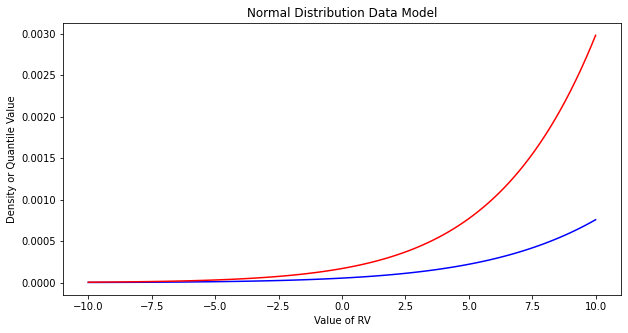

In [19]:
import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.plot(x, ypdf, color ='blue') 
matplotlib.pyplot.plot(x, ycdf, color ='red') 
matplotlib.pyplot.xlabel("Value of RV") 
matplotlib.pyplot.ylabel("Density or Quantile Value") 
matplotlib.pyplot.title("Normal Distribution Data Model") 
matplotlib.pyplot.show() 

### Exceedence Probability 

The purpose of distributions is to model data and allow us to estimate an answer to the question, what is the probability that we will observe a value of the random variable less than or equal to some sentinel value?  A common way to plot the quantile function is with accumulated probability on the horizontal axis, and random variable value on the vertical axis.
Consider the figure below;

![](http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/1-Lessons/Lesson13/PsuedoLesson/exceedence.png)

The RV Value is about 50,000 indicated by the horizontal magenta line.  
The blue curve is some data model, for instance one of our distributions below.
The accumulated probability value at 50,000 is 0.1 or roughly 10% chance, but we also have to stipulate whether we are interested in less than or greater than.  

In the figure shown, $P(x <= 50,000)~ =~1.00~-~0.1~= 0.9~or~90\%$ and is a non-exceedence probability. In words we would state 
"The probability of observing a value less than or equal to 50,000 is 90%" the other side of the vertical line is the exceedence probability; in the figure $P(x > 50,000)~=~0.1~or~10\%$.  In words we would state "The probability of observing a value equal to or greater than 50,000 is 10%."  In risk analysis the sense of the probability is easily confusing, so when you can - make a plot.  Another way to look at the situation is to simply realize that the blue curve is the quantile function $F(X)$ with $X$ plotted on the vertical axis, and $F(X)$ plotted on the horizontal axis.

Now lets put these ideas to use.  We will sample from the population of integers from 0 to 100, with replacement.  Any single pull from the population is equally likely. Lets take 25 samples (about 1/4 of the total population - usually we dont know the size of the population).

In [20]:
import numpy

population = []
for i in range(0,101,1):
    population.append(i)
    
sample = numpy.random.choice(population,25)

In [21]:
# lets get some statistics
sample_mean = sample.mean()
sample_variance = sample.std()**2

In [22]:
# sort the sample in place!
sample.sort()
# built a relative frequency approximation to probability, assume each pick is equally likely
weibull_pp = []
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))

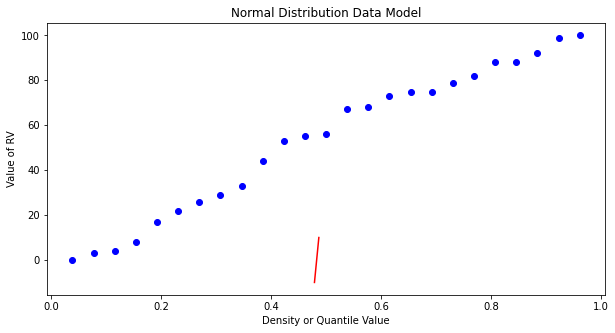

53.44

In [27]:
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.scatter(weibull_pp, sample, color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.ylabel("Value of RV") 
matplotlib.pyplot.xlabel("Density or Quantile Value") 
matplotlib.pyplot.title("Normal Distribution Data Model") 
matplotlib.pyplot.show() 

sample.mean()

What a horrible plot, but lets now use the sample statistics to "fit" the data model (red) to the observations (blue). Notice we have already rotated the axes so this plot and ones that follow are structured like the "Exceedence" plot above.

In [24]:
# Fitted Model

mu = sample_mean
sigma = math.sqrt(sample_variance)

x = []
ycdf = []

xlow = 0
xhigh = 100
howMany = 100
xstep = (xhigh - xlow)/howMany

for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 

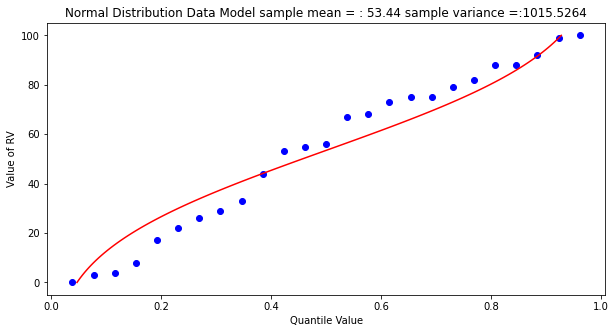

In [25]:
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.scatter(weibull_pp, sample,  color ='blue') 
matplotlib.pyplot.plot(ycdf, x,  color ='red') 
matplotlib.pyplot.ylabel("Value of RV") 
matplotlib.pyplot.xlabel("Quantile Value") 
mytitle = "Normal Distribution Data Model sample mean = : " + str(sample_mean)+ " sample variance =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

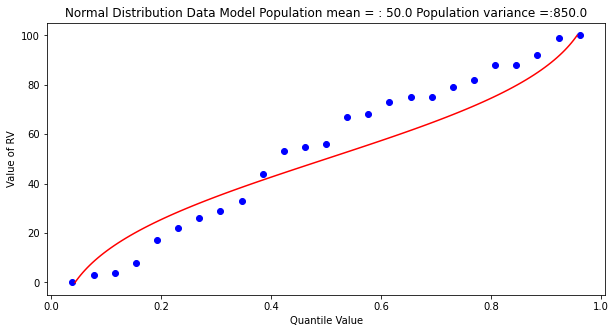

In [28]:
popmean = numpy.array(population).mean()
popvar = numpy.array(population).std()**2
# Fitted Model

mu = popmean
sigma = math.sqrt(popvar)

x = []
ycdf = []

xlow = 0
xhigh = 100
howMany = 100
xstep = (xhigh - xlow)/howMany

for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 

    
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.scatter(weibull_pp, sample, color ='blue') 
matplotlib.pyplot.plot(ycdf, x,  color ='red') 
matplotlib.pyplot.ylabel("Value of RV") 
matplotlib.pyplot.xlabel("Quantile Value") 
mytitle = "Normal Distribution Data Model Population mean = : " + str(popmean)+ " Population variance =:" + str(popvar)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

Some observations are in order:

- The population is a uniformly distributed collection. 
- By random sampling, and keeping the sample size small, the sample distribution appears approximately normal.  

Real things of engineering interest are not always bounded as shown here, the choice of the Weibull plotting position is not arbitrary.  The blue dot scatterplot in practice is called the empirical distribution function, or empirical quantile function.   

Now we will apply these ideas to some realistic data.

### Beargrass Creek

The file `beargrass.txt` contains annual peak flows for Beargrass Creek.  The year is a water year, so the peaks occur on different days in each year; thus it is not a time series. Let's examine the data and see how well a Normal distribution data model fits, then estimate from the distribution the peak magnitude with exceedence probability 0.01 (1%-chance that will observe a value equal to or greater).

In [41]:
# download the file from http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson21/beargrass.txt
import os
os.getcwd()
os.chdir('Lesson21')
os.getcwd()

'/home/sensei/engr-1330-webroot/1-Lessons/Lesson21'

In [42]:
import pandas
beargrass = pandas.read_csv('beargrass.txt')  #Reading a .csv file
beargrass.head()

,Year,Peak
0,1945,1810
1,1946,791
2,1947,839
3,1948,1750
4,1949,898


<AxesSubplot:>

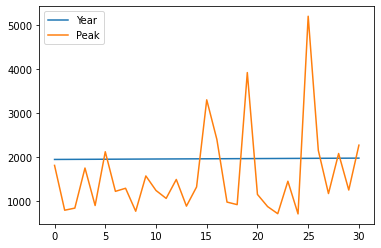

In [43]:
beargrass.plot()

 Now we will just copy code (the miracle of cut-n-paste!)

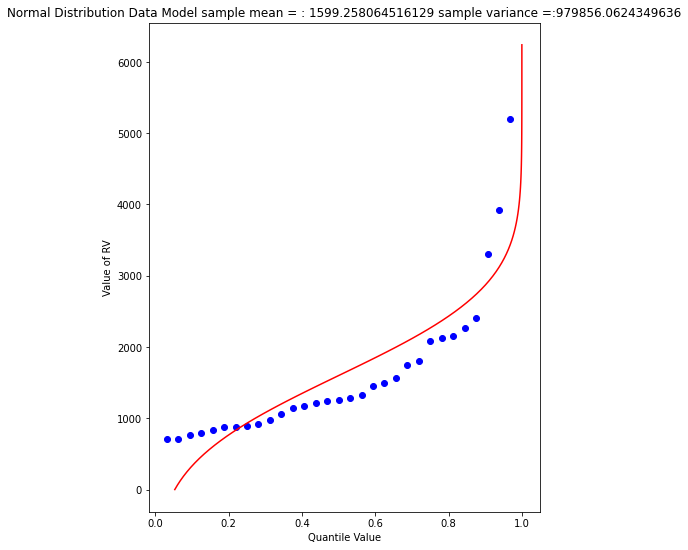

In [44]:
sample = beargrass['Peak'].tolist() # put the peaks into a list
sample_mean = numpy.array(sample).mean()
sample_variance = numpy.array(sample).std()**2
sample.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))
################
mu = sample_mean # Fitted Model
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(sample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Normal Distribution Data Model sample mean = : " + str(sample_mean)+ " sample variance =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

In [45]:
beargrass['Peak'].describe()

count      31.000000
mean     1599.258065
std      1006.239500
min       707.000000
25%       908.000000
50%      1250.000000
75%      1945.000000
max      5200.000000
Name: Peak, dtype: float64

A 1% chance exceedence is on the right side of the chart, it is the compliment of 99% non-exceedence, in terms of our quantile function we want to find the value $X$ that returns a quantile of 0.99.

In [46]:
myguess = 6000
print(mu,sigma)
print(normdist(myguess,mu,sigma))

1599.258064516129 989.8767915427474
0.9999956206542673


In [47]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    mu = 1599.258064516129
    sigma = 989.8767915427474
    quantile = 0.99999
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))


5820.974479887303


So a peak discharge of 4000 or so is expected to be observed with 1% chance, notice we took the value from the fitted distribution, not the empirical set.  As an observation, the Normal model is not a very good data model for these observations.

### Log-Normal

Another data model we can try is log-normal, where we stipulate that the logarithms of the observations are normal.  The scripts are practically the same, but there is an inverse transformation required to recover original value scale.  Again we will use Beargrass creek.  

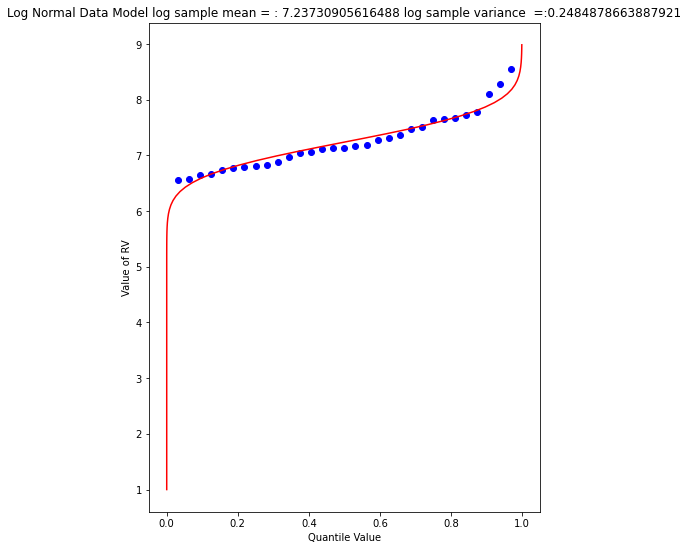

In [48]:
def loggit(x):  # A prototype function to log transform x
    return(math.log(x))

logsample = beargrass['Peak'].apply(loggit).tolist() # put the peaks into a list
sample_mean = numpy.array(logsample).mean()
sample_variance = numpy.array(logsample).std()**2
logsample.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))
################
mu = sample_mean # Fitted Model in Log Space
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 1; xhigh = 1.05*max(logsample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, logsample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Log Normal Data Model log sample mean = : " + str(sample_mean)+ " log sample variance  =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

The plot doesn't look too bad, but we are in log-space, which is hard to interpret, so we will transform back to arithmetic space 

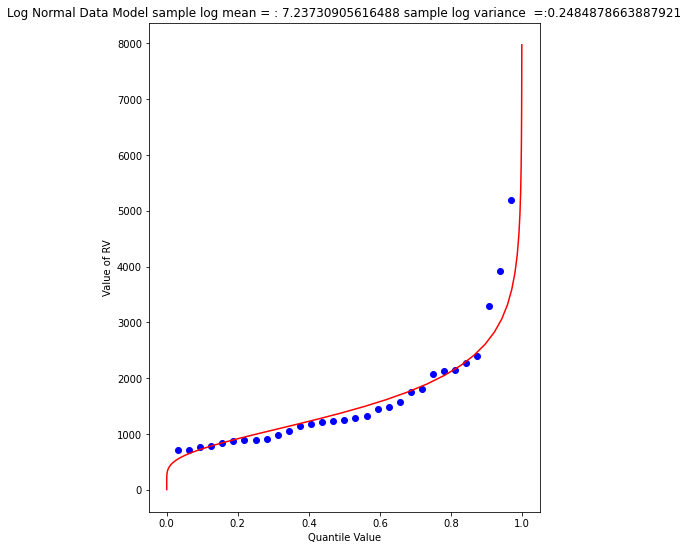

In [49]:
def antiloggit(x):  # A prototype function to log transform x
    return(math.exp(x))

sample = beargrass['Peak'].tolist() # pull original list
sample.sort() # sort in place
################
mu = sample_mean # Fitted Model in Log Space
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 1; xhigh = 1.05*max(logsample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(antiloggit(xlow + i*xstep))
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Log Normal Data Model sample log mean = : " + str((sample_mean))+ " sample log variance  =:" + str((sample_variance))
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

Visually a better data model, now lets determine the 1% chance value.

In [50]:
myguess = 4440
print(mu,sigma)
print(normdist(loggit(myguess),mu,sigma)) # mu, sigma already in log space - convert myguess

7.23730905616488 0.4984855728993489
0.9900772507418302


In [51]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    mu = 7.23730905616488
    sigma = 0.4984855728993489
    quantile = 0.99
    argument = (loggit(x) - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))

4433.567789173262


Now we have a decent method, we should put stuff into functions to keep code concise, lets examine a couple more data models

### Gumbell (Double Exponential) Distribution

The Gumbell is also called the Extreme-Value Type I distribution, the density and quantile function are:

$$ \text{pdf(x)} = \frac{1}{\beta} \cdot exp [-\frac{(x-\alpha)}{\beta} - exp (-\frac{(x-\alpha)}{\beta}) ]$$

$$ F(X) =  \int_{-\infty}^X{\frac{1}{\beta} \cdot exp [-\frac{(x-\alpha)}{\beta} - exp (-\frac{(x-\alpha)}{\beta}) ] dx} = exp [- exp (-\frac{(X-\alpha)}{\beta})] $$

The distribution has two parameters, $\alpha$ and $\beta$, which in some sense play the same role as mean and variance. Lets modify our scripts further to see how this data model performs on the Bearcreek data.

Of course we need a way to estimate the parameters, a good approximation can be obtained using:

$$ \alpha = \mu \cdot \frac{\sqrt{6}}{\pi} $$

and

$$ \beta = 0.45 \cdot \sigma $$

where $\mu$ and $\sigma^2$ are the sample mean and variance.

In [52]:
def ev1dist(x,alpha,beta):
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist

Now literally substitute into our prior code!

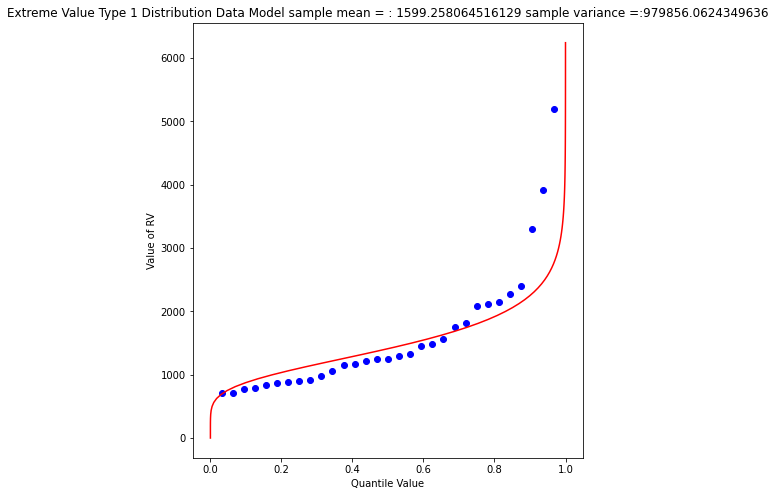

In [53]:
sample = beargrass['Peak'].tolist() # put the peaks into a list
sample_mean = numpy.array(sample).mean()
sample_variance = numpy.array(sample).std()**2
alpha_mom = sample_mean*math.sqrt(6)/math.pi
beta_mom = math.sqrt(sample_variance)*0.45
sample.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))
################
mu = sample_mean # Fitted Model
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(sample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = ev1dist(xlow + i*xstep,alpha_mom,beta_mom)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Extreme Value Type 1 Distribution Data Model sample mean = : " + str(sample_mean)+ " sample variance =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

Again a so-so visual fit.
To find the 1% chance value

In [54]:
myguess = 3300
print(alpha_mom,beta_mom)
print(ev1dist(myguess,alpha_mom,beta_mom)) # 

1246.9363972503857 445.4445561942363
0.990087892543188


In [55]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    alpha = 1246.9363972503857
    beta = 445.4445561942363
    quantile = 0.99
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist - quantile

print(newton(f, myguess))

3296.0478279991366


### Gamma Distribution (as Pearson Type 3)

One last data model to consider is one that is specifically stipulated for use by federal agencies for probability estimation of extreme hydrologic events.  The data model ia called the Log-Pearson Type III distribution, its actually a specific case of a Gamma distrubution.  

This example we will dispense with tyring to build it in python primative, and just use a package - the density function is not all that hard, but the quantile function is elaborate.  

Learn more at http://54.243.252.9/engr-1330-webroot/3-Readings/NumericalRecipesinF77.pdf (in particular around Page 276)

As usual, lets let Google do some work for us, using the search term "gamma quantile function; scipy" we get to this nice blog entry https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html which is a good start. 

A Pearson Type III data model has the following density function:

$$ f(x|\tau,\alpha,\beta) = \frac{(\frac{x-\tau}{\beta})^{\alpha -1}\cdot exp( - \frac{x-\tau}{\beta})}{|\beta| \Gamma(\alpha)}$$

If we make some substitutions:
$ \lambda = \frac{1}{\beta} ; \hat{x} = x -\tau $ then the density function is

$$ f(\hat{x}) = \frac{ 1}{\Gamma(\alpha)} (\lambda \hat{x})^{\alpha -1}\cdot exp( - \lambda \hat{x} )$$

which is now a one parameter Gamma density function just like the example in the link.

Reading a little from http://54.243.252.9/engr-1330-webroot/Bulletin17C-tm4b5-draft-ACWI-17Jan2018.pdf we can relate the transformations to descriptive statistics (shown below without explaination) as:

$\mu = \text{sample mean}$,

$\sigma = \text{sample standard deviation}$, 

$\gamma = \text{sample skew coefficient} = (\frac{n}{\sigma^3(n-1)(n-2)})\sum_{i=1}^n(x_i - \mu)^3 $

$\alpha = \frac{4}{\gamma^2}$  

$\beta = sign(\gamma)\sqrt{\frac{\sigma^2}{\alpha}}$

$\tau = \mu - \alpha \cdot \beta$

So we have a bit of work to do.  The name of the functions in `scipy` we are interested in are `gamma.pdf(x,a)` and `gamma.cdf(x,a)`  So lets build a tool to generate a Log-Pearson Type III data model, then apply it to Beargrass Creek.  We will use a lot of glue here.

First load in dependencies, and define support functions we will need 

In [56]:
import scipy.stats # import scipy stats package
import math        # import math package
import numpy       # import numpy package
# log and antilog
def loggit(x):  # A prototype function to log transform x
    return(math.log(x))
def antiloggit(x):  # A prototype function to log transform x
    return(math.exp(x))
def weibull_pp(sample): # plotting position function
# returns a list of plotting positions; sample must be a numeric list
    weibull_pp = [] # null list to return after fill
    sample.sort() # sort the sample list in place
    for i in range(0,len(sample),1):
        weibull_pp.append((i+1)/(len(sample)+1))
    return weibull_pp


Then the gamma distribution from scipy, modified for our type of inputs.

In [57]:
def gammacdf(x,tau,alpha,beta): # Gamma Cumulative Density function - with three parameter to one parameter convert
    xhat = x-tau
    lamda = 1.0/beta
    gammacdf = scipy.stats.gamma.cdf(lamda*xhat, alpha)
    return gammacdf

Then load in the data from the data frame, log transform and generate descriptive statistics.

In [58]:
#sample = beargrass['Peak'].tolist() # put the peaks into a list
sample = beargrass['Peak'].apply(loggit).tolist() # put the log peaks into a list
sample_mean  = numpy.array(sample).mean()
sample_stdev = numpy.array(sample).std()
sample_skew  = 3.0 # scipy.stats.skew(sample)
sample_alpha = 4.0/(sample_skew**2)
sample_beta  = numpy.sign(sample_skew)*math.sqrt(sample_stdev**2/sample_alpha)
sample_tau   = sample_mean - sample_alpha*sample_beta

Now generate plotting positions for the sample observations

In [59]:
plotting = weibull_pp(sample)

Now generate values for the data model (for plotting our red line "fit"), set limits to be a little beyond the sample range.

In [60]:
x = []; ycdf = []
xlow = (0.9*min(sample)); xhigh = (1.1*max(sample)) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = gammacdf(xlow + i*xstep,sample_tau,sample_alpha,sample_beta)
    ycdf.append(yvalue) 

Now reverse transform back to native scale, and plot the sample values vs plotting position in blue, and the data model in red

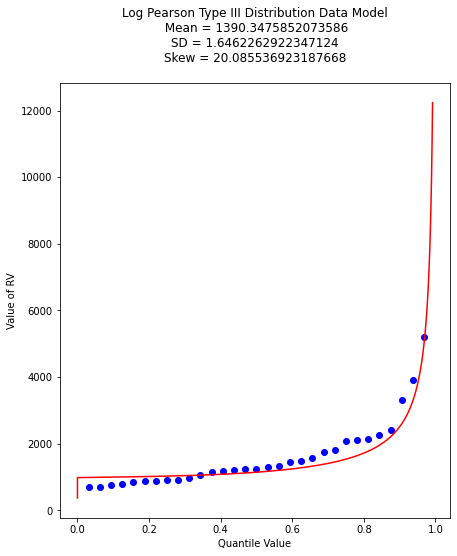

In [61]:
# reverse transform the peaks, and the data model peaks
for i in range(len(sample)):
    sample[i] = antiloggit(sample[i])
for i in range(len(x)):
    x[i] = antiloggit(x[i])
myfigure = matplotlib.pyplot.figure(figsize = (7,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(plotting, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Log Pearson Type III Distribution Data Model\n "
mytitle += "Mean = " + str(antiloggit(sample_mean)) + "\n"
mytitle += "SD = " + str(antiloggit(sample_stdev)) + "\n"
mytitle += "Skew = " + str(antiloggit(sample_skew)) + "\n"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

And as before lets find the value that retruns the 99% quantile - we will just use the newton method above.
First recover the required model parameters. Then we will paste these into the $f(x)$ function for the Newton's method.

In [62]:
print(sample_tau)
print(sample_alpha)
print(sample_beta)

6.904985340898647
0.4444444444444444
0.7477283593490234


In [63]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    sample_tau = 5.976005311346212
    sample_alpha = 6.402272915026134
    sample_beta = 0.1970087438569494
    quantile = 0.9900
    argument = loggit(x)
    gammavalue = gammacdf(argument,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

myguess =  5000
print(newton(f, myguess))

5856.10913158364


Trust, but verify!

In [64]:
round(gammacdf(loggit(5856.109),sample_tau,sample_alpha,sample_beta),4)

0.9753

Now lets summarize our efforts regarding Beargrass Creek annual peaks and probabilities anticipated.

|Data Model|99% Peak Flow|Remarks|
|:---|:---|:---|
|Normal|3902|so-so visual fit|           
|Log-Normal|4433|better visual fit|            
|Gumbell|3296|better visual fit|            
|Log-Pearson III|5856|best (of the set) visual fit|

At this point, now we have to choose our model and then can investigate different questions.  So using LP3 as our favorite, lets now determine anticipated flow values for different probabilities (from the data model) - easy enought to just change the quantile value and rerun the newtons optimizer, for example:

|Exceedence Probability|Flow Value|Remarks|
|:---|:---|:---|
|25% |968| First Quartile Divider|           
|50% |1302| Median, and Second Quartile Divider|            
|75% |1860| 3rd Quartile Divider|            
|90% |2706| 10% chance of greater value|
|99% |5856| 1% chance of greater value (in flood statistics, this is the 1 in 100-yr chance event)|
|99.8%|9420| 0.002% chance of greater value (in flood statistics, this is the 1 in 500-yr chance event)|
|99.9%|11455| 0.001% chance of greater value (in flood statistics, this is the 1 in 1000-yr chance event)|

In [40]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    sample_tau = 5.976005311346212
    sample_alpha = 6.402272915026134
    sample_beta = 0.1970087438569494
    quantile = 0.50
    argument = loggit(x)
    gammavalue = gammacdf(argument,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

myguess =  1000
print(newton(f, myguess))

1302.814639184079


## Additional Narrative

### Important Terminology:
__Plotting Position:__ An empirical distribution, based on a random sample from a (possibly unknown) probability distribution, obtained by plotting the exceedance (or cumulative) probability of the sample distribution against the sample value. <br>
The exceedance probability for a particular sample value is a function of sample size and the rank of the particular sample. For exceedance probabilities, the sample values are ranked from largest to smallest. The general expression in common use for plotting position is

$$ P = \frac{m - b}{N + 1 -2b}\ $$

where m is the ordered rank of a sample value, N is the sample size, and b is a constant between 0 and 1, depending on the plotting method.<br>

![](https://d3i71xaburhd42.cloudfront.net/5af0d037a082d4fc59aa4129e1996324c0fff6d9/3-Table1-1.png)

__*From:__<br>
__*https://glossary.ametsoc.org/wiki/*__<br>


__Let's work on example. First, import the necessary packages:__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

__Read the "lab14_E1data.csv" file as a dataset:__

In [ ]:
# download the file from http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson21/lab14_E1data.csv

In [2]:
data = pd.read_csv("lab14_E1data.csv") 
data

,Set1,Set2
0,46.688625,512.459480
1,44.825192,480.551364
2,71.453564,560.502112
3,30.360172,503.885912
4,47.657087,458.124749
...,...,...
95,60.040915,462.122309
96,21.527991,509.909507
97,59.523999,572.309957
98,38.173070,562.580099


__The dataset contains two sets of values: "Set1" and "Set2". Use descriptive functions to learn more the sets.__

In [3]:
# Let's check out set1 and set2
set1 = data['Set1']
set2 = data['Set2']
print(set1)
print(set2)

0     46.688625
1     44.825192
2     71.453564
3     30.360172
4     47.657087
        ...    
95    60.040915
96    21.527991
97    59.523999
98    38.173070
99    39.671168
Name: Set1, Length: 100, dtype: float64
0     512.459480
1     480.551364
2     560.502112
3     503.885912
4     458.124749
         ...    
95    462.122309
96    509.909507
97    572.309957
98    562.580099
99    497.784981
Name: Set2, Length: 100, dtype: float64


In [4]:
set1.describe()

count    100.000000
mean      48.566581
std       15.861475
min       13.660911
25%       38.229562
50%       49.369139
75%       59.580899
max       86.356515
Name: Set1, dtype: float64

In [5]:
set2.describe()

count    100.000000
mean     508.276381
std       47.978391
min      408.244489
25%      470.288351
50%      507.096010
75%      541.199481
max      629.497949
Name: Set2, dtype: float64

__Remember the Weibull Plotting Position formula from last session. Use Weibull Plotting Position formula to plot set1 and set2 quantiles on the same graph.__<br>
__Do they look different? How?__

In [6]:
def weibull_pp(sample): # Weibull plotting position function
# returns a list of plotting positions; sample must be a numeric list
    weibull_pp = [] # null list to return after fill
    sample.sort() # sort the sample list in place
    for i in range(0,len(sample),1):
        weibull_pp.append((i+1)/(len(sample)+1)) #values from the gringorten formula
    return weibull_pp

In [7]:
#Convert to numpy arrays
set1 = np.array(set1)
set2 = np.array(set2)

In [8]:
#Apply the weibull pp function
set1_wei = weibull_pp(set1)
set2_wei = weibull_pp(set2)

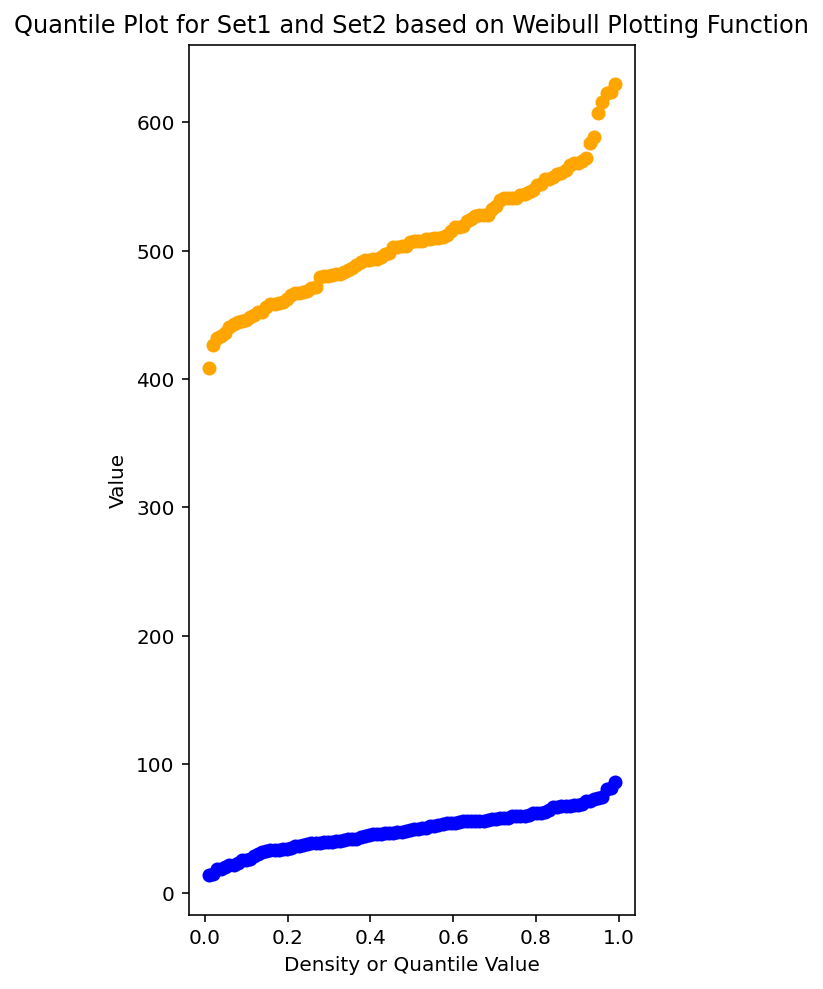

In [9]:
myfigure = matplotlib.pyplot.figure(figsize = (4,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(set1_wei, set1 ,color ='blue')
matplotlib.pyplot.scatter(set2_wei, set2 ,color ='orange')
matplotlib.pyplot.xlabel("Density or Quantile Value") 
matplotlib.pyplot.ylabel("Value") 
matplotlib.pyplot.title("Quantile Plot for Set1 and Set2 based on Weibull Plotting Function") 
matplotlib.pyplot.show()

__Do they look different? How?__

__Define functions for Gringorten, Cunnane, California, and Hazen Plotting Position Formulas. Overlay and Plot them all for set 1 and set2 on two different graphs.__<br>

In [18]:
def gringorten_pp(sample): # plotting position function
# returns a list of plotting positions; sample must be a numeric list
    gringorten_pp = [] # null list to return after fill
    sample.sort() # sort the sample list in place
    for i in range(0,len(sample),1):
        gringorten_pp.append((i+1-0.44)/(len(sample)+0.12)) #values from the gringorten formula
    return gringorten_pp

In [19]:
set1_grin = gringorten_pp(set1)
set2_grin = gringorten_pp(set2)

In [20]:
def cunnane_pp(sample): # plotting position function
# returns a list of plotting positions; sample must be a numeric list
    cunnane_pp = [] # null list to return after fill
    sample.sort() # sort the sample list in place
    for i in range(0,len(sample),1):
        cunnane_pp.append((i+1-0.40)/(len(sample)+0.2)) #values from the cunnane formula
    return cunnane_pp

In [21]:
set1_cun = cunnane_pp(set1)
set2_cun = cunnane_pp(set2)

In [22]:
def california_pp(sample): # plotting position function
# returns a list of plotting positions; sample must be a numeric list
    california_pp = [] # null list to return after fill
    sample.sort() # sort the sample list in place
    for i in range(0,len(sample),1):
        california_pp.append((i+1)/(len(sample))) #values from the cunnane formula
    return california_pp

In [23]:
set1_cal = california_pp(set1)
set2_cal = california_pp(set2)

In [24]:
def hazen_pp(sample): # plotting position function
# returns a list of plotting positions; sample must be a numeric list
    hazen_pp = [] # null list to return after fill
    sample.sort() # sort the sample list in place
    for i in range(0,len(sample),1):
        hazen_pp.append((i+1-0.5)/(len(sample))) #values from the cunnane formula
    return hazen_pp

In [25]:
set1_haz = hazen_pp(set1)
set2_haz = hazen_pp(set2)

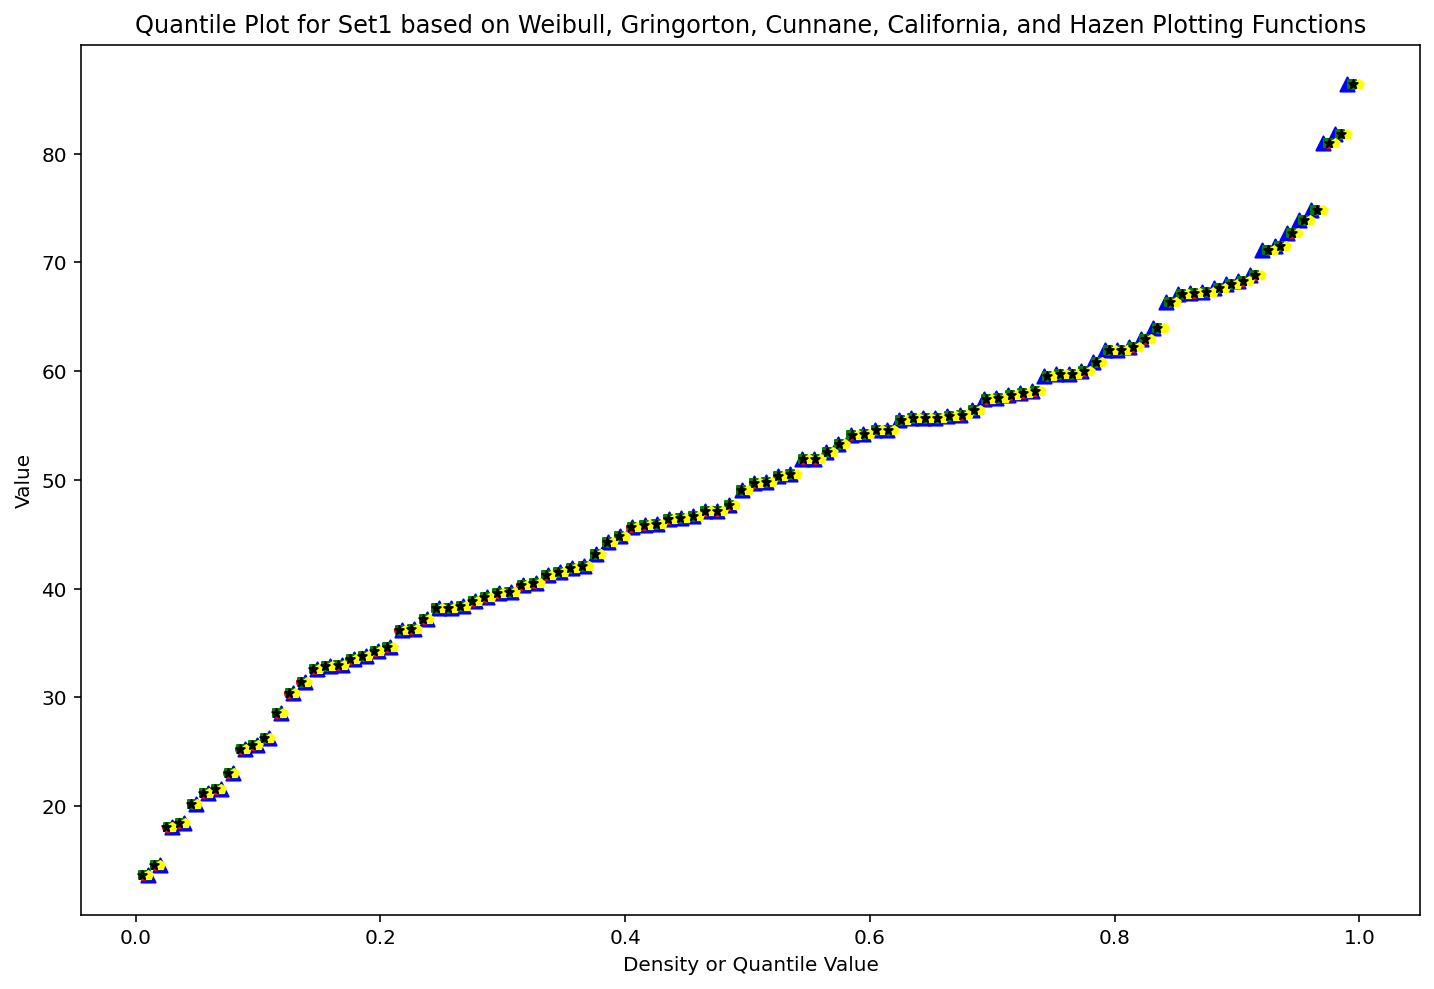

In [26]:
myfigure = matplotlib.pyplot.figure(figsize = (12,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(set1_wei, set1 ,color ='blue',
            marker ="^",  
            s = 50)
matplotlib.pyplot.scatter(set1_grin, set1 ,color ='red',
            marker ="o",  
            s = 20)
matplotlib.pyplot.scatter(set1_cun, set1 ,color ='green',
            marker ="s",  
            s = 20)
matplotlib.pyplot.scatter(set1_cal, set1 ,color ='yellow',
            marker ="p",  
            s = 20)
matplotlib.pyplot.scatter(set1_haz, set1 ,color ='black',
            marker ="*",  
            s = 20)
matplotlib.pyplot.xlabel("Density or Quantile Value") 
matplotlib.pyplot.ylabel("Value") 
matplotlib.pyplot.title("Quantile Plot for Set1 based on Weibull, Gringorton, Cunnane, California, and Hazen Plotting Functions") 
matplotlib.pyplot.show()

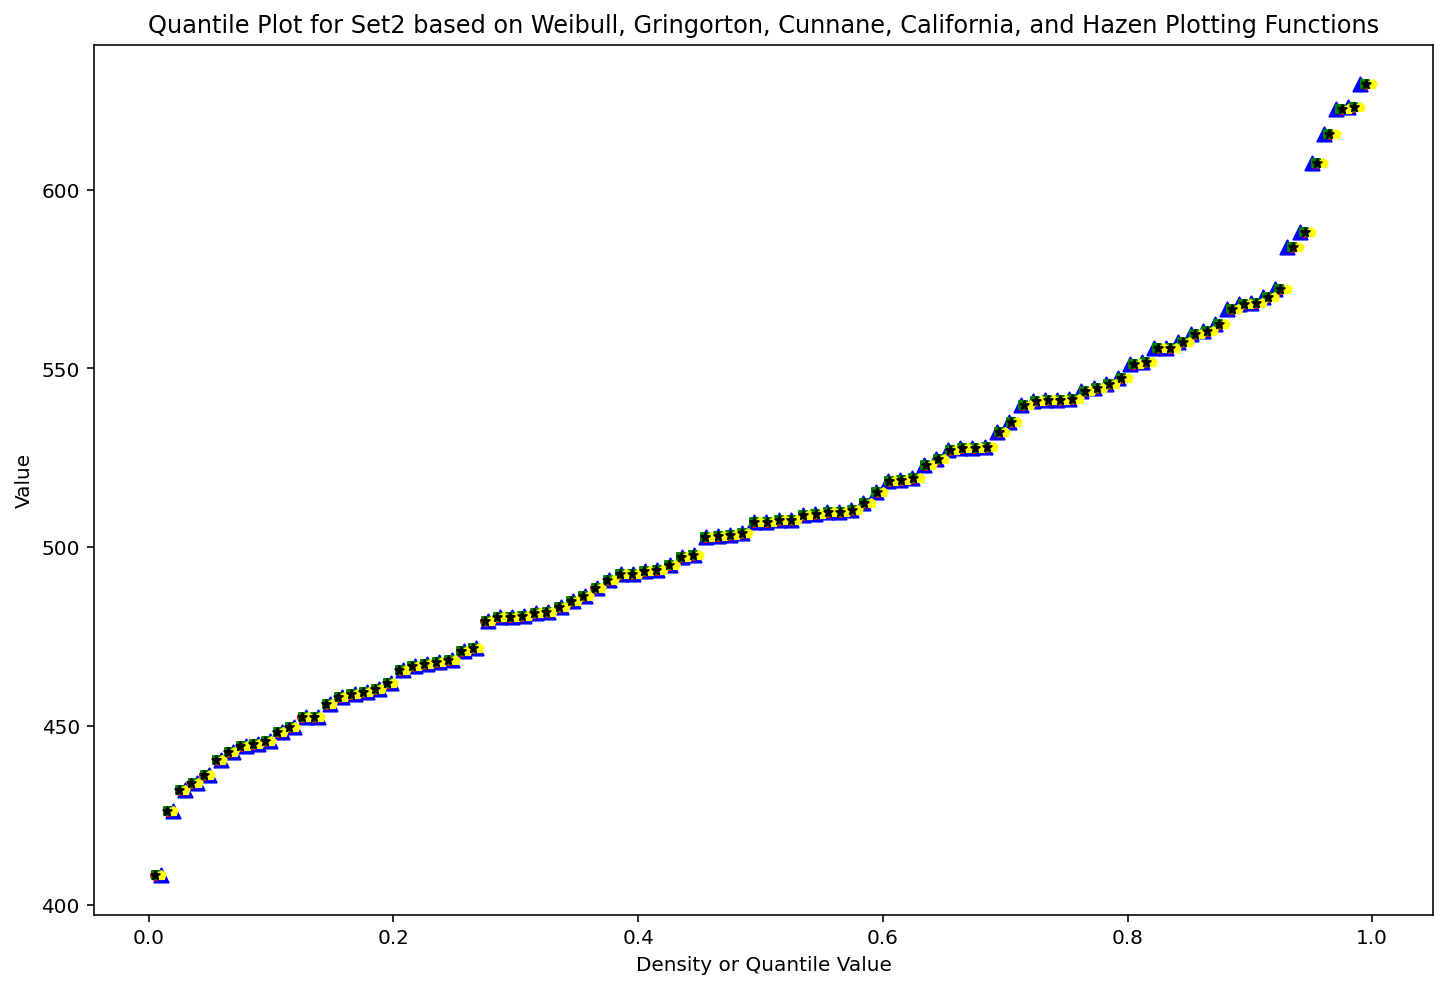

In [27]:
myfigure = matplotlib.pyplot.figure(figsize = (12,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(set2_wei, set2 ,color ='blue',
            marker ="^",  
            s = 50)
matplotlib.pyplot.scatter(set2_grin, set2 ,color ='red',
            marker ="o",  
            s = 20)
matplotlib.pyplot.scatter(set2_cun, set2 ,color ='green',
            marker ="s",  
            s = 20)
matplotlib.pyplot.scatter(set2_cal, set2 ,color ='yellow',
            marker ="p",  
            s = 20)
matplotlib.pyplot.scatter(set2_haz, set2 ,color ='black',
            marker ="*",  
            s = 20)
matplotlib.pyplot.xlabel("Density or Quantile Value") 
matplotlib.pyplot.ylabel("Value") 
matplotlib.pyplot.title("Quantile Plot for Set2 based on Weibull, Gringorton, Cunnane, California, and Hazen Plotting Functions") 
matplotlib.pyplot.show()

__Plot a histogram of Set1 with 10 bins.__<br>

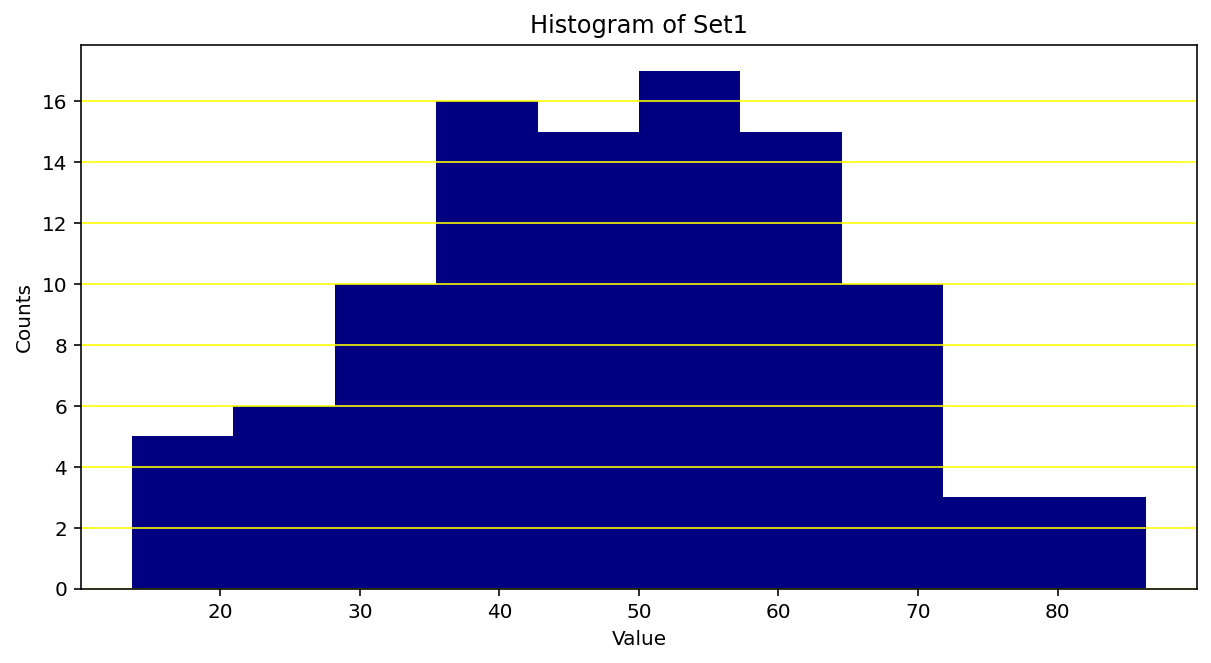

In [28]:
import matplotlib.pyplot as plt
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

set1 = data['Set1']
set1.plot.hist(grid=False, bins=10, rwidth=1,
                   color='navy')
plt.title('Histogram of Set1')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.grid(axis='y',color='yellow', alpha=1)

__Plot a histogram of Set2 with 10 bins.__<br>

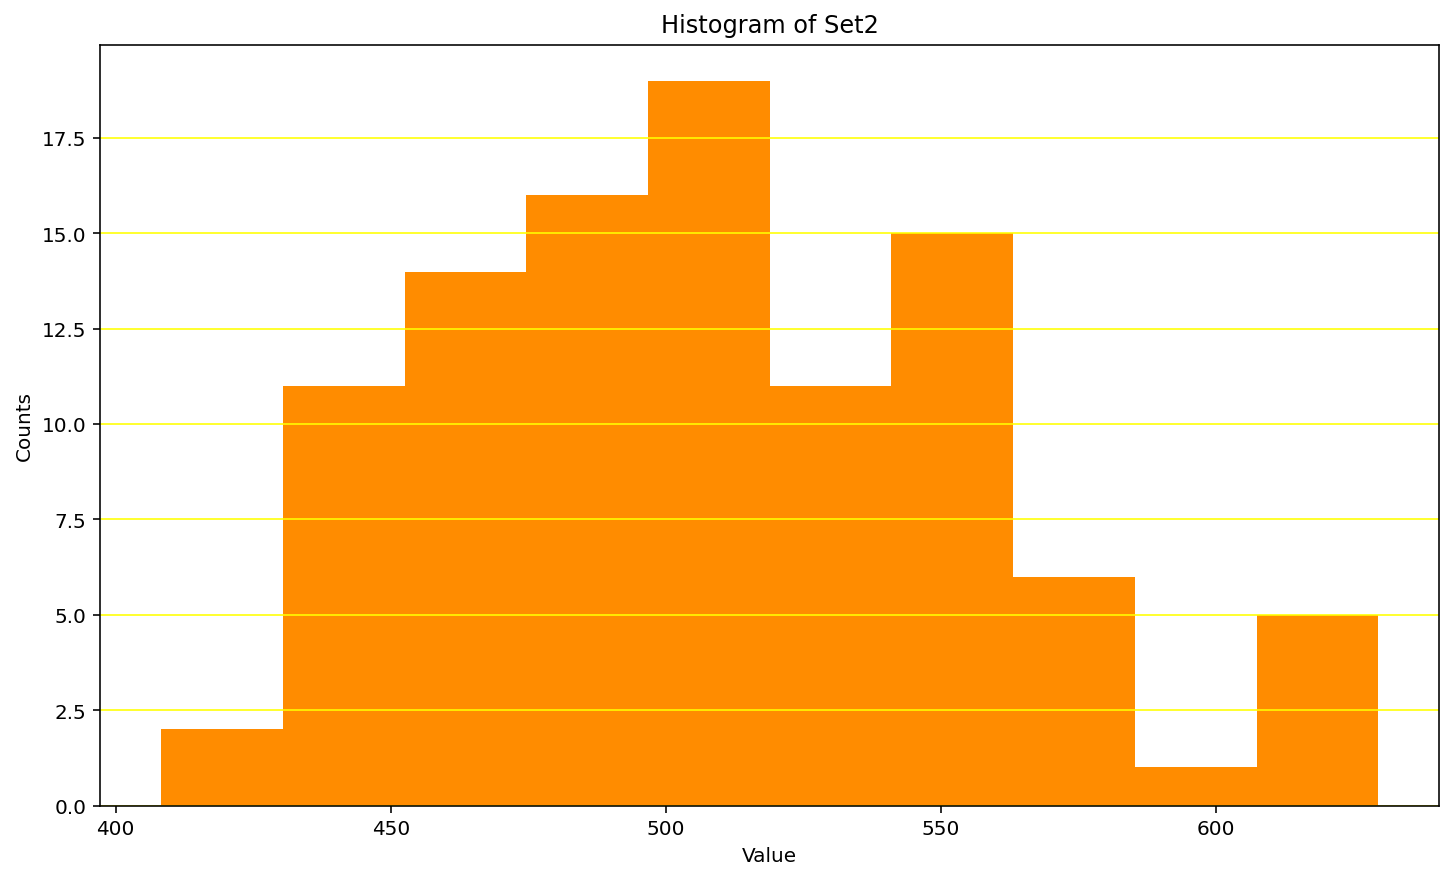

In [29]:
set2 = data['Set2']
set2.plot.hist(grid=False, bins=10, rwidth=1,
                   color='darkorange')
plt.title('Histogram of Set2')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.grid(axis='y',color='yellow', alpha=1)

__Plot a histogram of both Set1 and Set2 and discuss the differences.__<br>

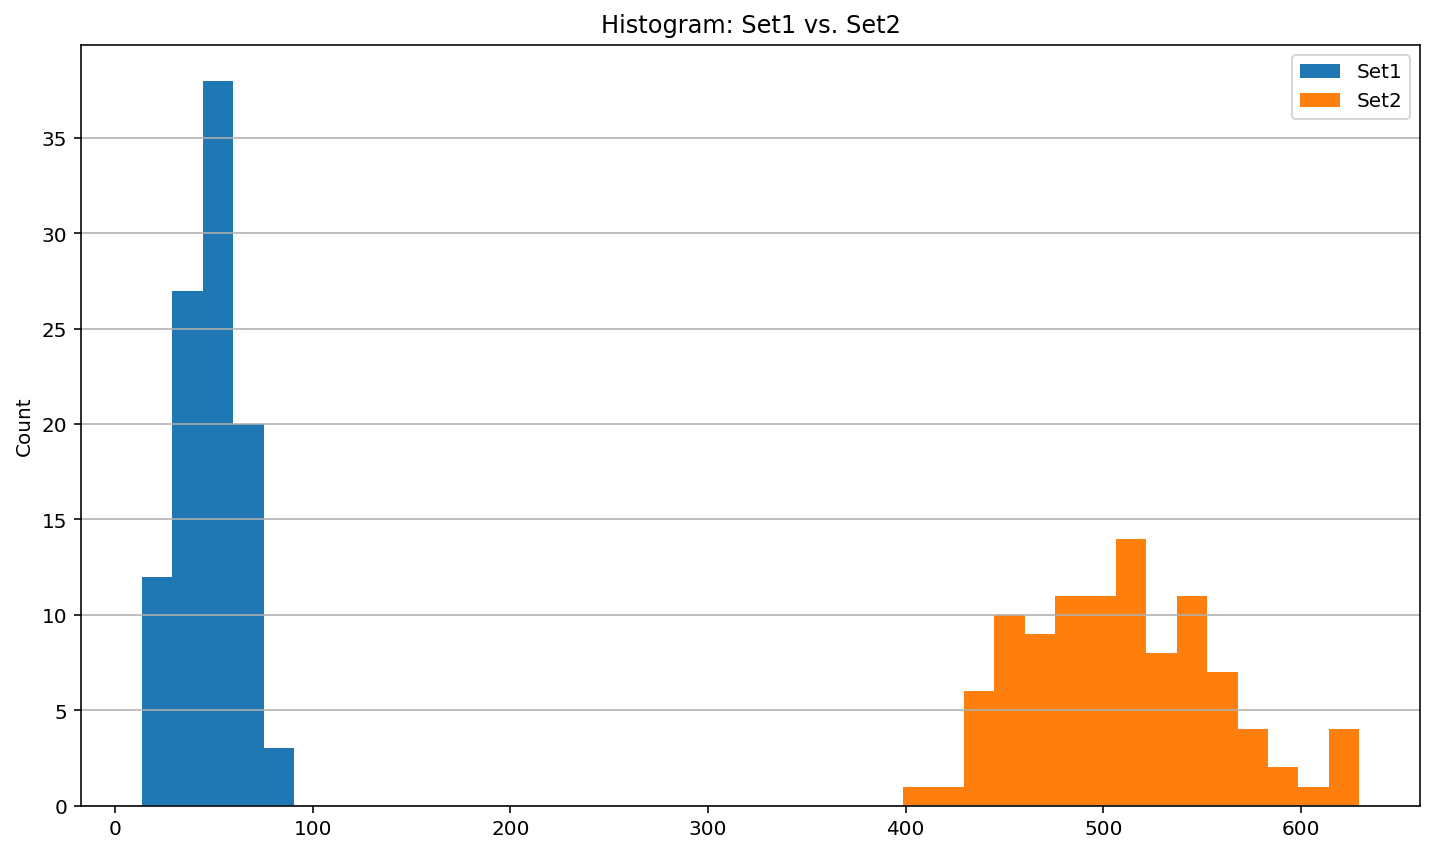

In [30]:
fig, ax = plt.subplots()
data.plot.hist(density=False, ax=ax, title='Histogram: Set1 vs. Set2', bins=40)
ax.set_ylabel('Count')
ax.grid(axis='y')

__The cool 'seaborn' package: Another way for plotting histograms and more!__<br>


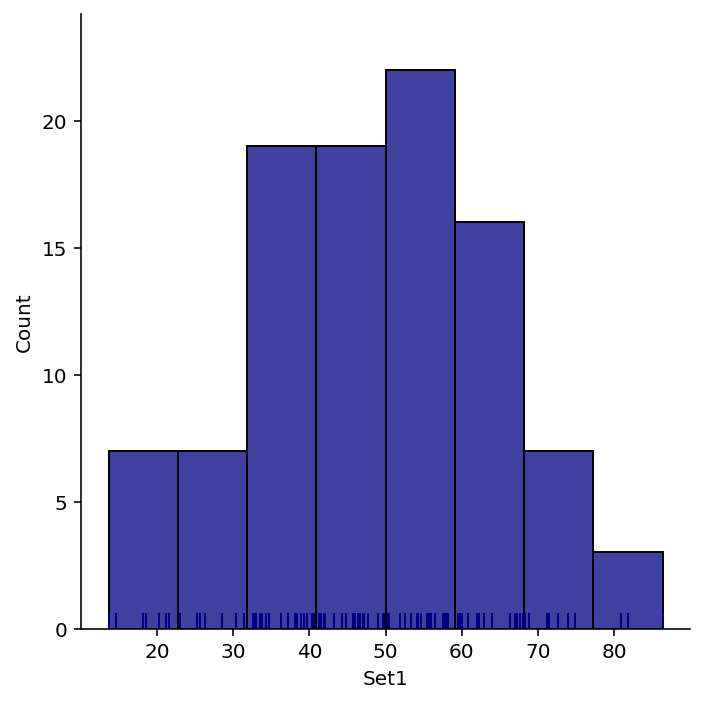

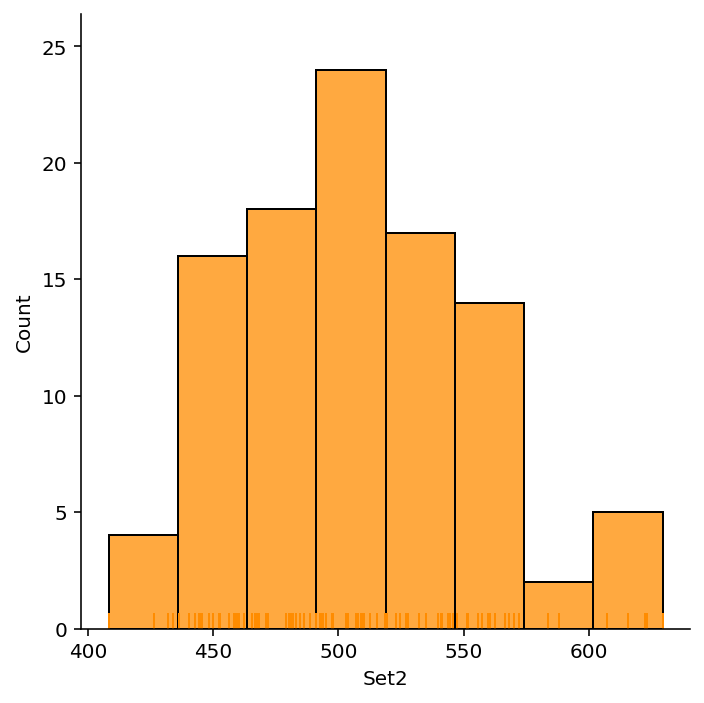

In [32]:
import seaborn as sns
sns.displot(set1,color='navy', rug=True)
sns.displot(set2,color='darkorange', rug=True)

### Important Terminology:
__Kernel Density Estimation (KDE):__ a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. This can be useful if you want to visualize just the “shape” of some data, as a kind of continuous replacement for the discrete histogram.<br>

__*From:__<br>
__*https://en.wikipedia.org/wiki/Kernel_density_estimation*__<br>
__*https://mathisonian.github.io/kde/* >> A SUPERCOOL Blog!__<br>
__*https://www.youtube.com/watch?v=fJoR3QsfXa0* >> A Nice Intro to distplot in seaborn | Note that displot is pretty much the same thing!__<br>




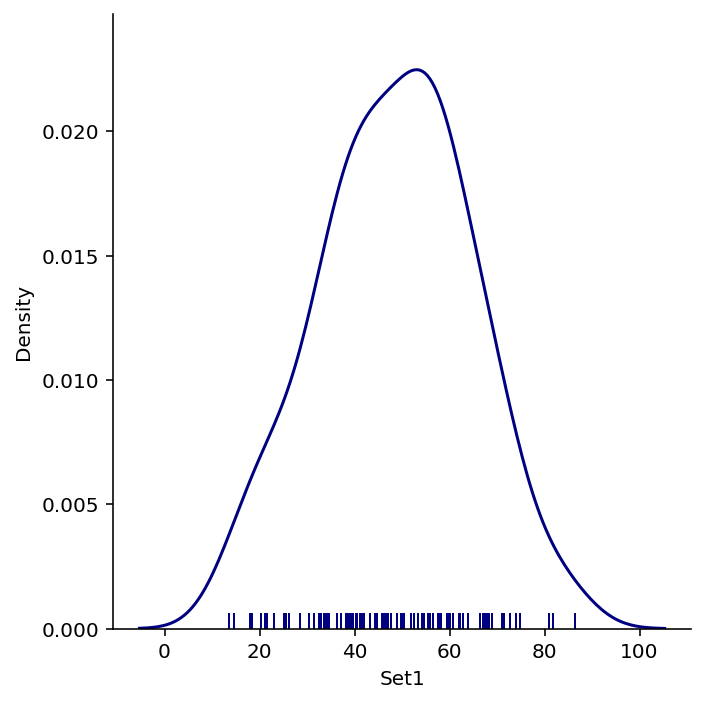

In [33]:
sns.displot(set1,color='navy',kind='kde',rug=True)

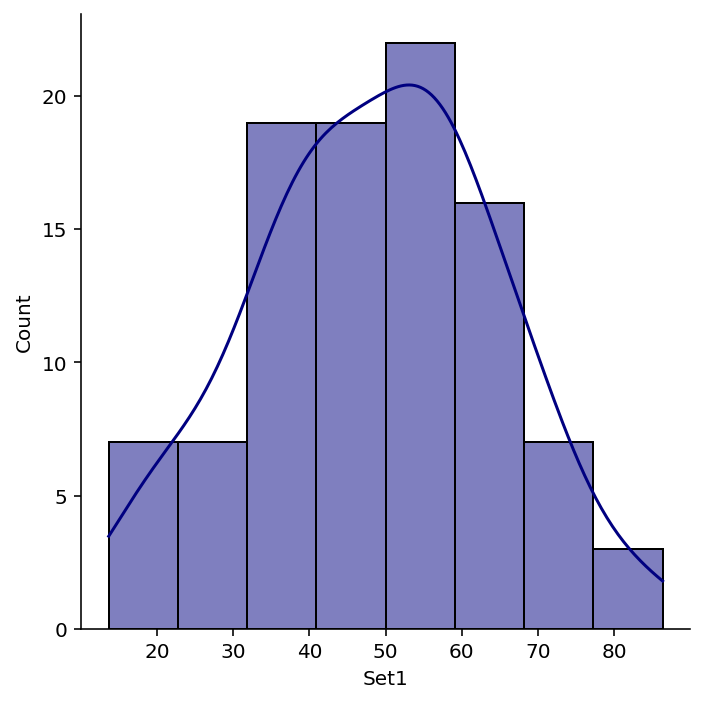

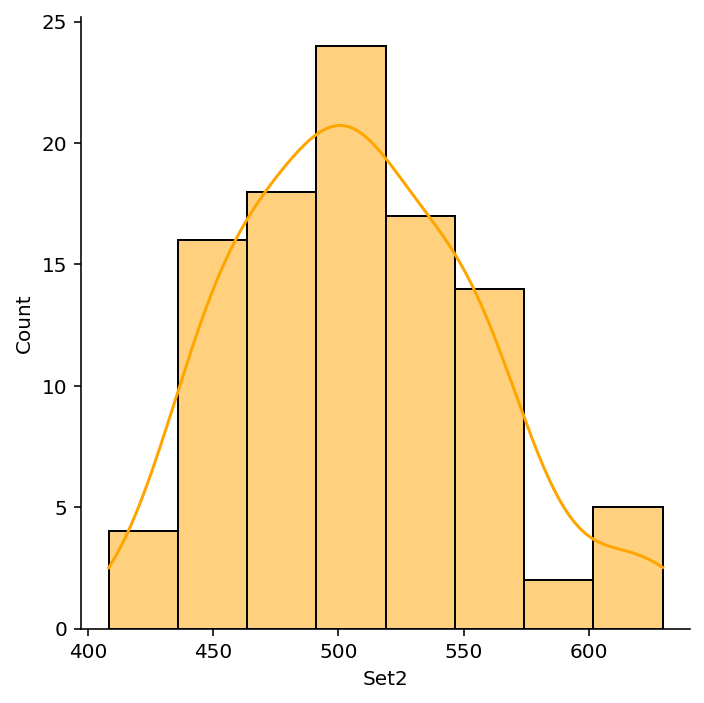

In [25]:
sns.displot(set1,color='navy',kde=True)
sns.displot(set2,color='orange',kde=True)

### Important Terminology:
__Empirical Cumulative Distribution Function (ECDF):__ the distribution function associated with the empirical measure of a sample. This cumulative distribution function is a step function that jumps up by 1/n at each of the n data points. Its value at any specified value of the measured variable is the fraction of observations of the measured variable that are less than or equal to the specified value. <br>

__*From:__<br>
__*https://en.wikipedia.org/wiki/Empirical_distribution_function*__<br>

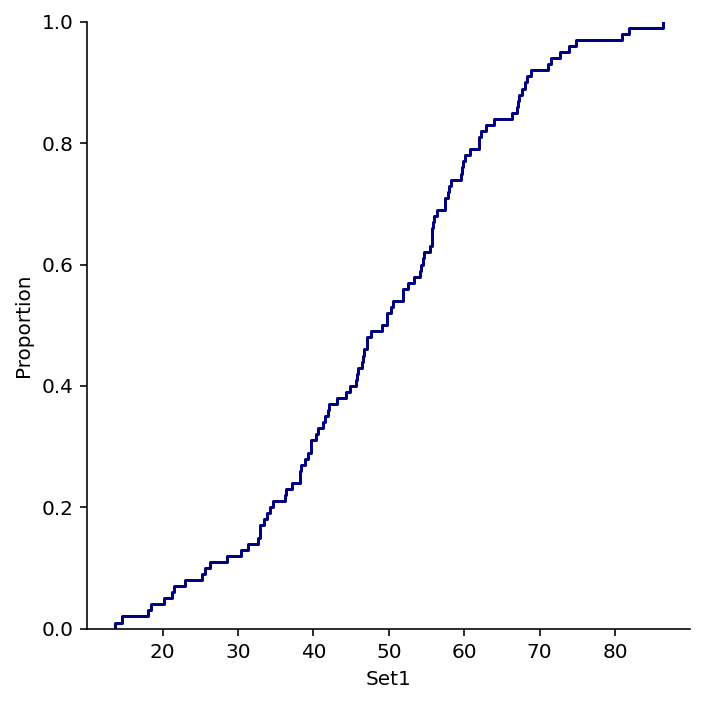

In [26]:
sns.displot(set1,color='navy',kind='ecdf')

__Fit a Normal distribution data model to both Set1 and Set2. Plot them seperately. Describe the fit.__<br>

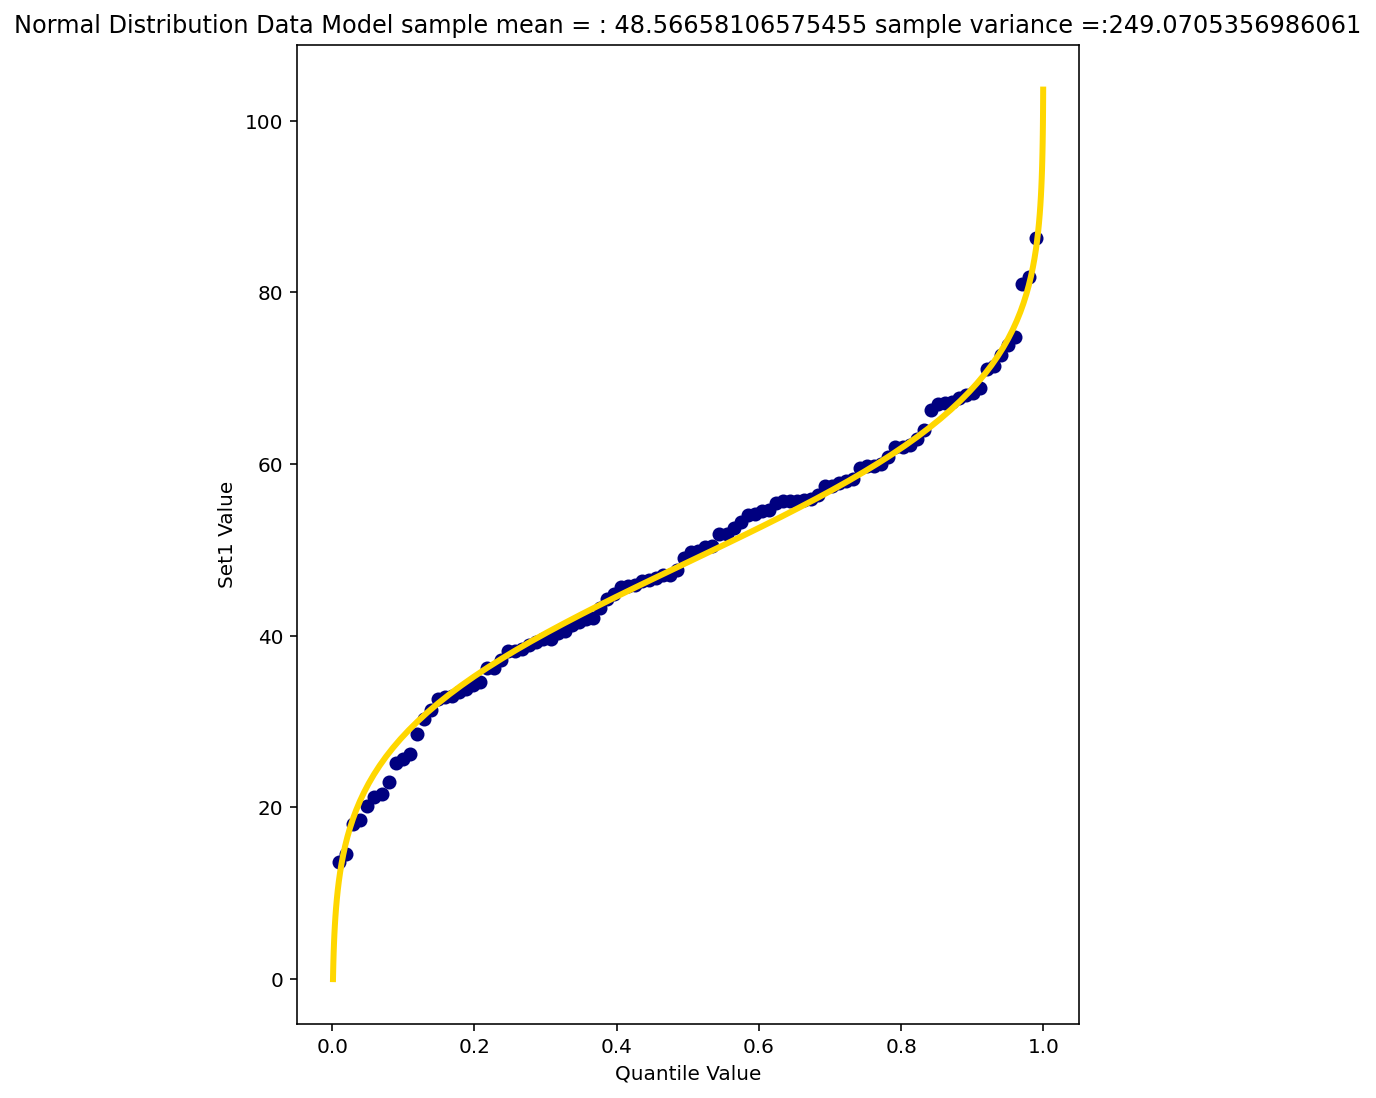

In [35]:
set1 = data['Set1']
set2 = data['Set2']
set1 = np.array(set1)
set2 = np.array(set2)
set1_wei = weibull_pp(set1)
set2_wei = weibull_pp(set2)

# Normal Quantile Function
import math

def normdist(x,mu,sigma):
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist
# For set1
mu = set1.mean() # Fitted Model
sigma = set1.std()
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(set1) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue)
# Fitting Data to Normal Data Model 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(set1_wei, set1 ,color ='navy') 
matplotlib.pyplot.plot(ycdf, x, color ='gold',linewidth=3) 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Set1 Value") 
mytitle = "Normal Distribution Data Model sample mean = : " + str(mu)+ " sample variance =:" + str(sigma**2)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

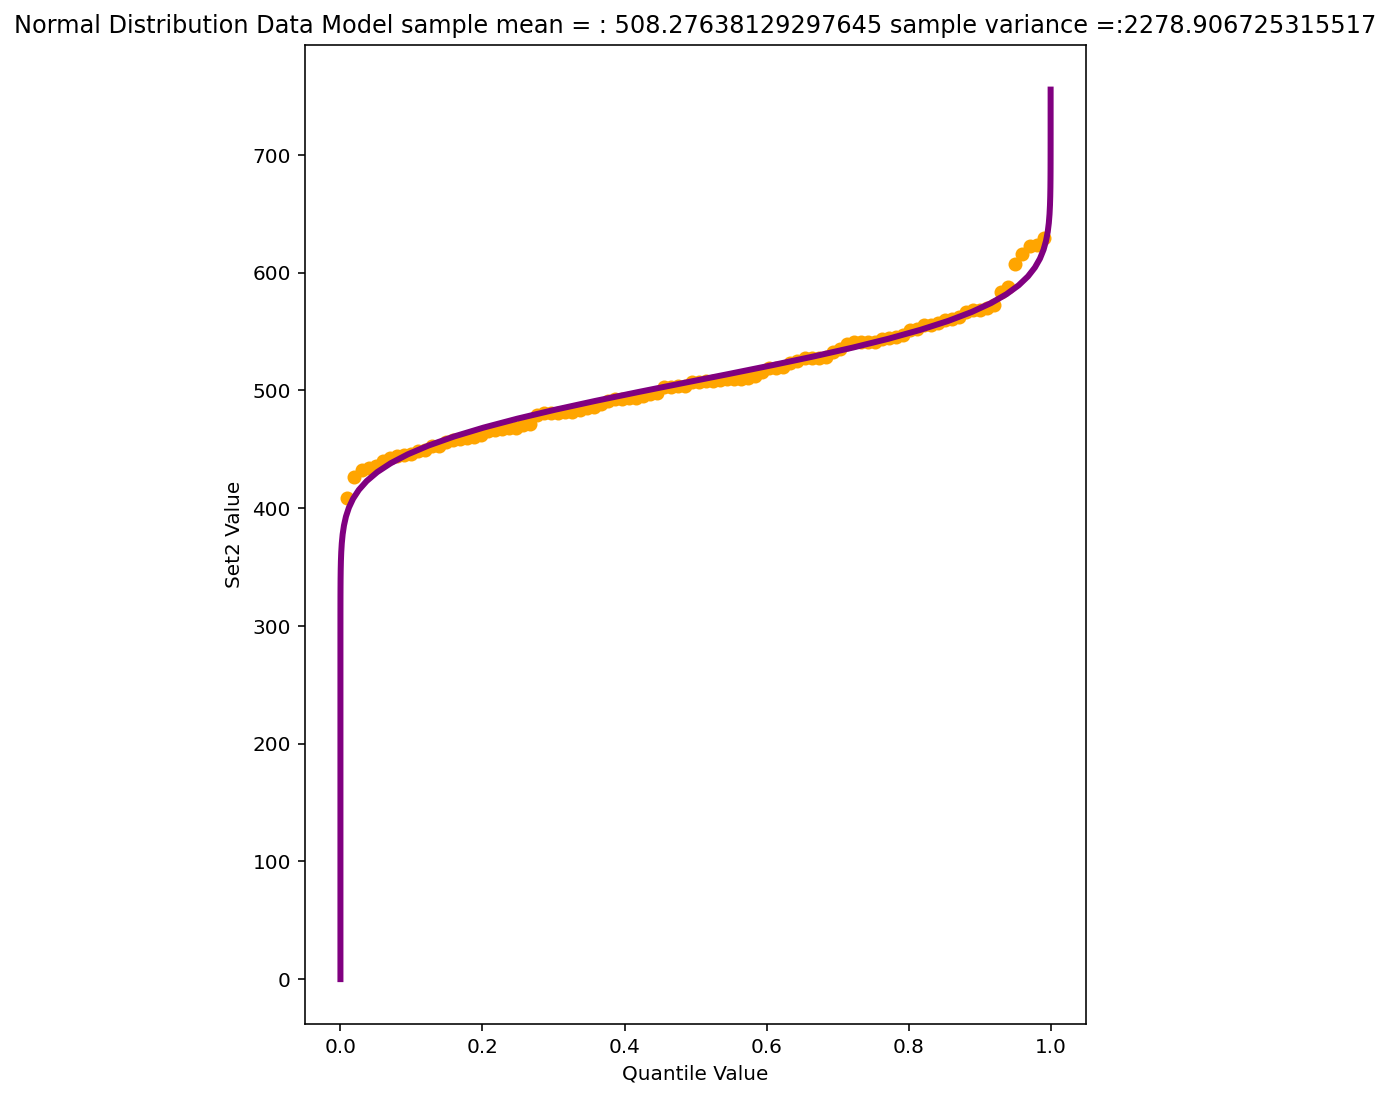

In [36]:
# For set2
mu = set2.mean() # Fitted Model
sigma = set2.std()
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(set2) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue)
# Fitting Data to Normal Data Model 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(set2_wei, set2 ,color ='orange') 
matplotlib.pyplot.plot(ycdf, x, color ='purple',linewidth=3) 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Set2 Value") 
mytitle = "Normal Distribution Data Model sample mean = : " + str(mu)+ " sample variance =:" + str(sigma**2)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

__Since it was an appropriate fit, we can use the normal distrubation to generate another sample randomly from the same population. Use a histogram with the new generated sets and compare them visually.__<br>

In [37]:
mu1 = set1.mean()
sd1 = set1.std()
mu2 = set2.mean()
sd2 = set2.std()
set1_s = np.random.normal(mu1, sd1, 100)
set2_s = np.random.normal(mu2, sd2, 100)

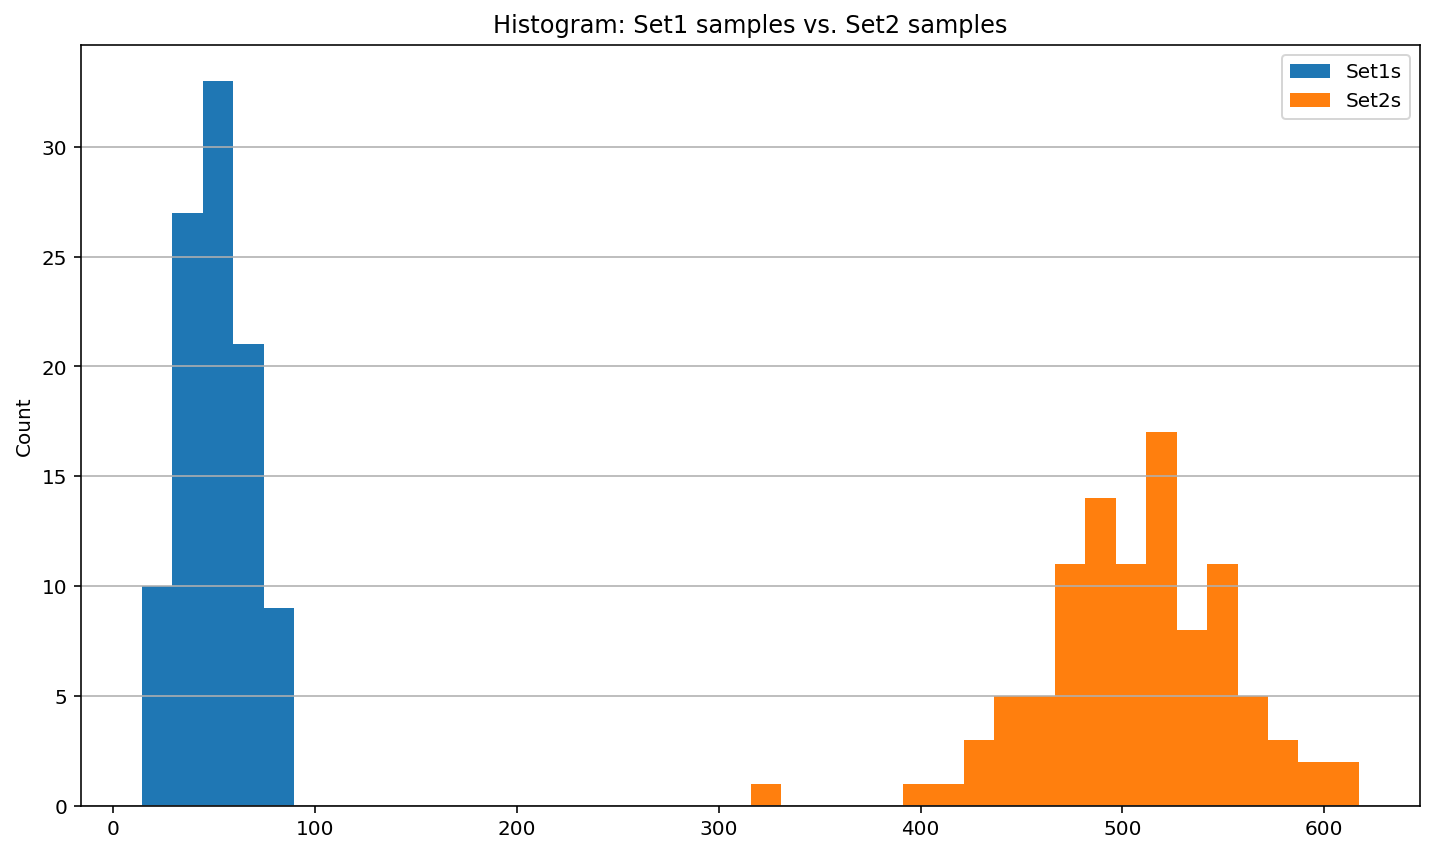

In [38]:
data_d = pd.DataFrame({'Set1s':set1_s,'Set2s':set2_s})

fig, ax = plt.subplots()
data_d.plot.hist(density=False, ax=ax, title='Histogram: Set1 samples vs. Set2 samples', bins=40)
ax.set_ylabel('Count')
ax.grid(axis='y')

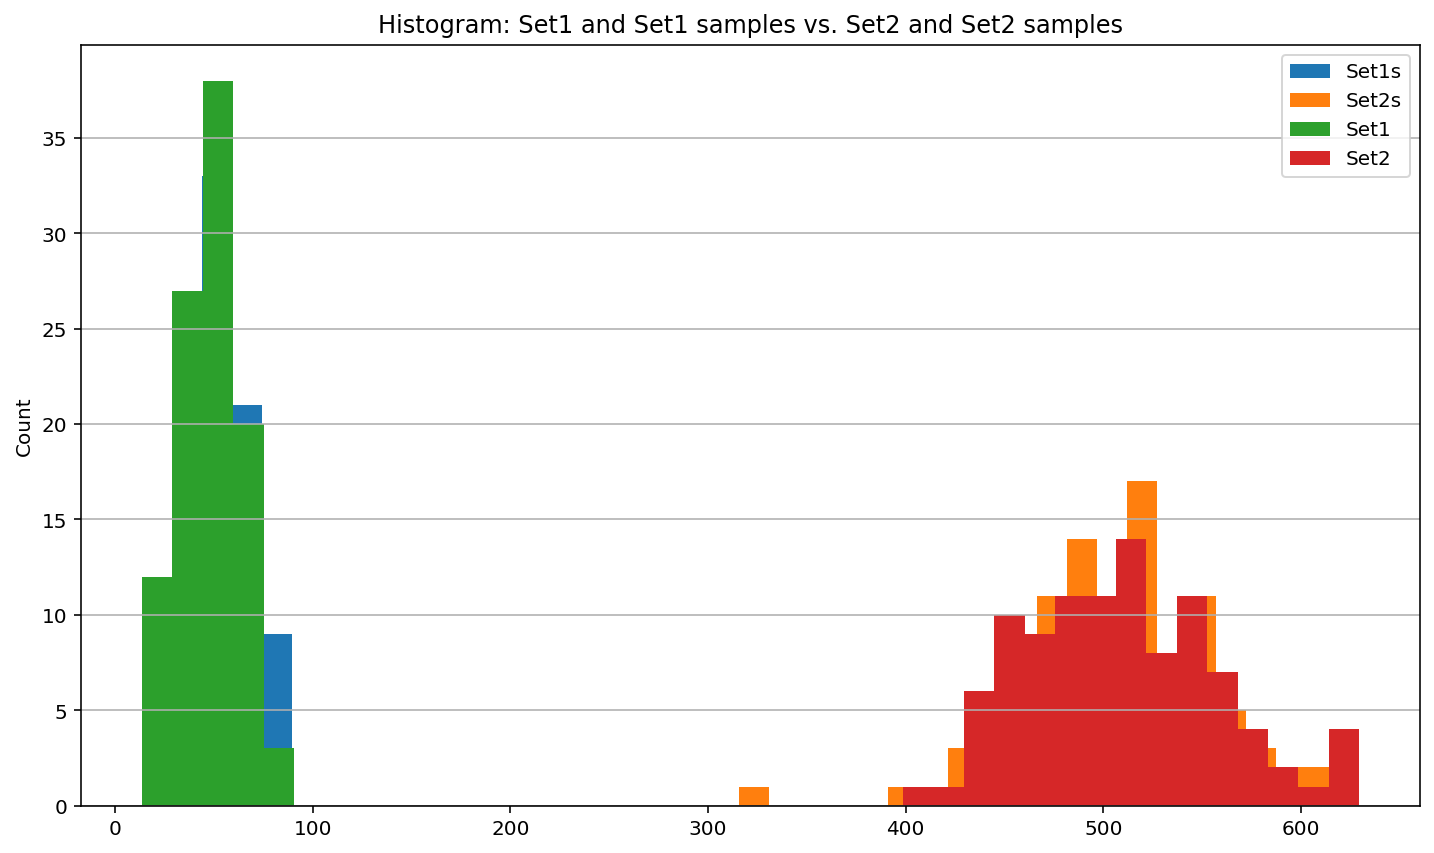

In [39]:

fig, ax = plt.subplots()
data_d.plot.hist(density=False, ax=ax, title='Histogram: Set1 and Set1 samples vs. Set2 and Set2 samples', bins=40)
data.plot.hist(density=False, ax=ax, bins=40)

ax.set_ylabel('Count')
ax.grid(axis='y')

__Use boxplots to compare the four sets. Discuss their differences.__<br>

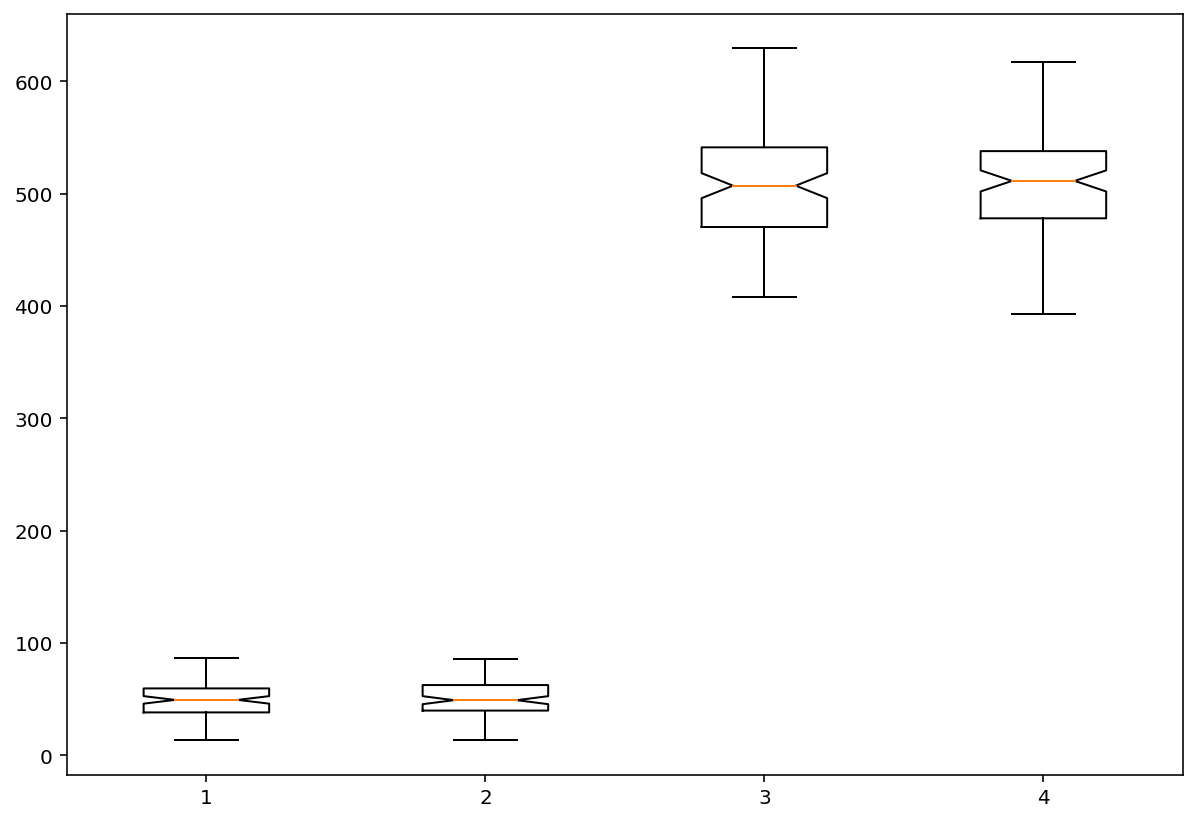

In [41]:
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot ([set1, set1_s, set2, set2_s],1, '')
plt.show()

## References:

0. Jamie Chan (2014) Learn Python in One Day and Learn It Well. LCF Publishing. Kindle Edition. http://www.learncodingfast.com/python

1. Grus, Joel. Data Science from Scratch: First Principles with Python. O'Reilly Media. Kindle Edition. (http://safaribooksonline.com)

2. Christian, B, and Griffiths Tom (2016) Algorithms to live by: The computer science of human decisions. Henry Holt and Company, ISBN 9781627790369 (hardcover)|ISBN 9781627790376 (electronic book)

3. https://www.amazon.com/Distributional-Statistics-Environment-Statistical-Computing/dp/1463508417
    
4. England, J.F. Jr., Cohn, T.A., Faber, B.A., Stedinger, J.R., Thomas Jr., W.O., Veilleux, A.G., Kiang, J.E., and Mason, R.R.Jr., 2018, Guidelines for Determining Flood Flow Frequency—Bulletin 17C: U.S. Geological Survey Techniques andMethods, book 4, chap. B5, 146 p., https://doi.org/10.3133/tm4B5

5. https://www.astroml.org/book_figures/chapter3/fig_gamma_distribution.html

6. https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html

7. https://www.inferentialthinking.com/chapters/15/Prediction.html